<a href="https://colab.research.google.com/github/juliorodrigues07/LH_CD_JULIORODRIGUES/blob/extras/notebooks/1_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA)**

##[Table of Contents](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=g-cc_ygMBtaS)

>[Imports and export directory](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=wxq3EEGhxAb6)

>[Loading Dataset](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=gZrmhDQGwotM)

>[1. Dataset Analysis](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=vACv0fQjnhnU)

>>[1.1. Graphs by Borough](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=IF8psn8OxWX_)

>>[1.2. Graphs by Room Type](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=FMWXv88v0Vo_)

>>[1.3. Graphs by Reviews](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=oKqoMMLk1gXw)

>[2. Correlationship Between Features](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=gmZos1eX2MSX)

>[3. Patterns in Text](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=dvWG7KOX762S)

>[4. Dimensionality Reduction](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=0NCEl41BDC3x)

>[5. Ideal Location to Invest](#updateTitle=true&folderId=1YHQAO3wwkfNb1JDYLbuQ4wx8jaIwgNwi&scrollTo=zCuMYkrkYg2Y)



# **Imports and export directory**


In [ ]:
!pip install -U kaleido
import pandas as pd
import gdown
from warnings import filterwarnings
from os.path import isdir
from os import getcwd
from os import mkdir


filterwarnings('ignore', category=DeprecationWarning)
filterwarnings('ignore', category=FutureWarning)

# Figures export directory
if not isdir(f'{getcwd()}/../plots'):
    mkdir(f'{getcwd()}/../plots')

# **Loading and renaming the dataset**

- Main problem: Develop a rent pricing prediction model based on a dataset;
- We're dealing with a regression problem, since the output object of interest (in this case, the price predicted) is a continuous variable. Continuous variables have an infinite amount of values between an interval, and thus cannot be counted. In a classification problem, the output variable is discrete and finite in an interval, such as determining if an URL is malicious or not, for example.

In [ ]:
# dataset = pd.read_csv(f'{getcwd()}/../datasets/pricing.csv')

output_file = "pricing.csv"
file_id = '1j8lxdtKR5ELOl6ksapQwzribYchz-0UG'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file)
dataset = pd.read_csv(output_file)

dataset = dataset.rename(columns={
    'id': 'ID',
    'nome': 'Name',
    'host_id': 'Host ID',
    'host_name': 'Host Name',
    'bairro_group': 'Neighborhood',
    'bairro': 'District',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'room_type': 'Room Type',
    'price': 'Price',
    'minimo_noites': 'Minimum Nights',
    'numero_de_reviews': 'Reviews',
    'ultima_review': 'Last Review',
    'reviews_por_mes': 'Monthly Reviews',
    'calculado_host_listings_count': 'Number of Listings',
    'disponibilidade_365': "Days Available"
})

Downloading...
From: https://drive.google.com/uc?id=1j8lxdtKR5ELOl6ksapQwzribYchz-0UG
To: /content/pricing.csv
100%|██████████| 7.08M/7.08M [00:00<00:00, 104MB/s]


# **1. Dataset Analysis**

## **1.1. Graphs by borough**

- Manhattan and Brooklyn on average, have the most expensive prices and least availability;
- This corresponds with the reputation from the boroughs, which are one of the most populous and visited in NY;
- On the other hand, Staten Island is one of the most unknown boroughs, which directly affects properties located there, reducing the average price and increasing availability.

In [ ]:
import plotly.express as px

df = dataset.copy()

boroughs = df['Neighborhood'].unique()
neighbor = df[df['Neighborhood'].isin(boroughs)]

graph1 = neighbor.groupby(('Neighborhood'))[['Price']].mean().reset_index()
fig1 = px.bar(graph1, x='Neighborhood', y='Price', color='Neighborhood',
              title="Average price per borough", width=800, height=400)
fig1.show()
fig1.write_image(f'{getcwd()}/../plots/avg_price_borough.svg')

In [ ]:
graph2 = neighbor.groupby(('Neighborhood'))[['Days Available']].mean().reset_index()
fig2 = px.bar(graph2, x='Neighborhood', y='Days Available', color='Neighborhood',
              title='Average availability per borough', width=800, height=400)
fig2.show()
fig2.write_image(f'{getcwd()}/../plots/avg_available_borough.svg')

## **1.2. Graphs by room type**

- Although shared rooms' average availability is high, the percentage of this room type present in the boroughs compared to the others is minimal (2,3% approximately);
- On the other hand, Private rooms have a considerable margin as the most expensive ones on average, which coincides with it corresponding to more than 70% of the total receipt.

In [ ]:
room_type = df["Room Type"].unique()
rooms = df[df["Room Type"].isin(room_type)]

graph3 = rooms.groupby(('Room Type'))[['Price']].mean().reset_index()
fig3 = px.bar(graph3, x='Room Type', y='Price', color='Room Type',
              title="Average price per room type", width=600, height=400)
fig3.show()
fig3.write_image(f'{getcwd()}/../plots/avg_price_room.svg')

In [ ]:
graph4 = rooms.groupby(('Room Type'))[['Days Available']].mean().reset_index()
fig4 = px.bar(graph4, x='Room Type', y='Days Available', color='Room Type',
              title="Average availability per room type", width=600, height=400)
fig4.show()
fig4.write_image(f'{getcwd()}/../plots/avg_available_room.svg')

In [ ]:
graph5 = df.groupby('Room Type')[['Price']].sum().reset_index()
fig5 = px.pie(graph5, values='Price', names='Room Type', title='Total receipt by room type',
              width=600, height=400)
fig5.show()
fig5.write_image(f'{getcwd()}/../plots/total_receipt.svg')

## **1.3. Graphs by reviews**

- No large discrepancies looking at monthly reviews per borough, although curiously the most expensive and famous ones (Manhattan and Brooklyn) have the least amounts;
- Considering minimum nights though, Manhattan has in average many more required to rent;
- Entire homes/apartments in general, also require a higher amount of minimum nights as opposed to shared or private rooms.

In [ ]:
graph6 = df.groupby(('Neighborhood'))[['Monthly Reviews']].mean().reset_index()
fig6 = px.bar(graph6, x='Neighborhood', y='Monthly Reviews', color='Neighborhood',
              title="Average montlhy reviews per borough", width=800, height=400)
fig6.show()
fig6.write_image(f'{getcwd()}/../plots/avg_review_borough.svg')

In [ ]:
graph7 = df.groupby(['Neighborhood', 'Room Type'])[['Minimum Nights']].mean().reset_index()
fig7 = px.bar(graph7, x='Neighborhood', y='Minimum Nights', color='Room Type',
              title="Average minimum nights required", width=800, height=400)
fig7.show()
fig7.write_image(f'{getcwd()}/../plots/avg_minnights.svg')

# **2. Relationship between minimun nights, availability and price**

- Due to the presence of outliers and dispersion of the data, there's no immediate visible correlation between the price and minimum nights or availability;
- The correlation matrix enforces this statement, as these features correlation values are close to zero (neutral correlation).

In [ ]:
import numpy as np


graph8 = df.groupby(['Minimum Nights'])[['Price']].mean().reset_index()
graph8['Price'] = np.log2(graph8['Price'])
fig8 = px.bar(graph8, x='Minimum Nights', y='Price', title="Average price by minimum nights required",
              labels={'Price': 'Price (log 2)'}, width=800, height=400)
fig8.show()
fig8.write_image(f'{getcwd()}/../plots/avg_price_minnights.svg')

In [ ]:
graph9 = df.groupby(['Days Available'])[['Price']].mean().reset_index()
fig9 = px.bar(graph9, x='Days Available', y='Price', title="Average price by availability",
              width=1200, height=400)
fig9.show()
fig9.write_image(f'{getcwd()}/../plots/avg_price_available.svg')

In [ ]:
import matplotlib.pyplot as plt


def plot_correlation_matrix(features: pd.DataFrame) -> None:

    # Remove rows which have any missing value in its features
    features = features.dropna(axis='index')
    features = features[[col for col in features if features[col].nunique() > 1]]

    if features.shape[1] < 2:
        exit()

    corr = features.corr()
    plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    corr_mat = plt.matshow(corr, fignum=1)

    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corr_mat)

    # -1: weak relationship | 0: neutral relationship | 1: strong relationship
    plt.clim(-1, 1)
    plt.title(f'Correlation Matrix', fontsize=16)

    plt.savefig(f'{getcwd()}/../plots/correlation_matrix.svg', format='svg')
    plt.show()

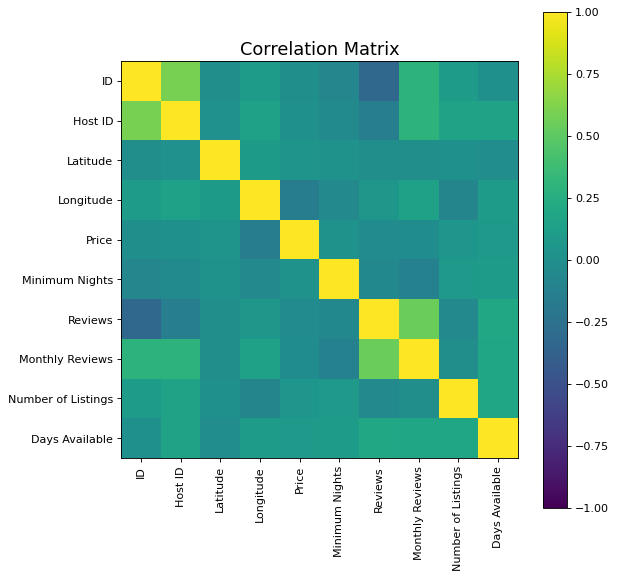

In [ ]:
plot_correlation_matrix(features=dataset)

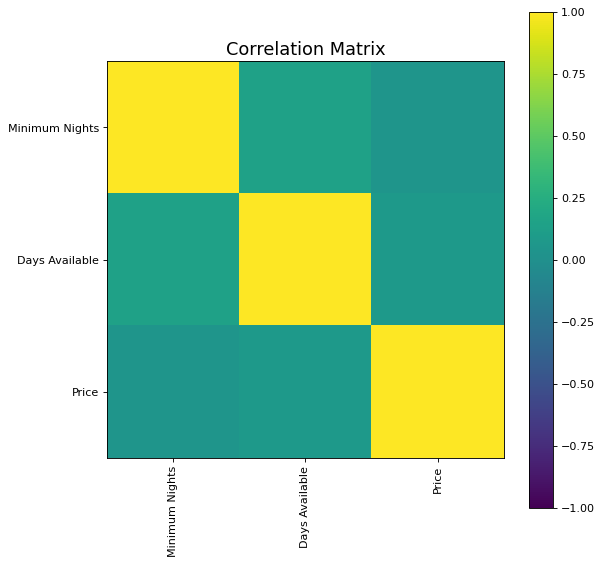

In [ ]:
selected = dataset[['Minimum Nights', 'Days Available', 'Price']]
plot_correlation_matrix(features=selected)

- Price target has some extreme outliers as shown at the boxplot, whose can affect negatively the ML model;
- Strategies to deal with this problem will have to be proposed (deletion, binning, ...).

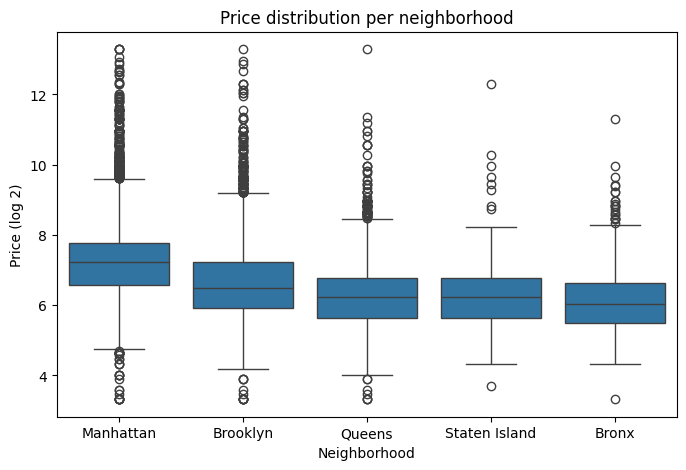

In [ ]:
import seaborn as sns

prices = dataset.copy()
prices['Price'] = np.log2(prices['Price'])
fig, axes = plt.subplots(figsize=(8, 5))
sns.boxplot(ax=axes, x='Neighborhood', y='Price', data=prices)

axes.set_title('Price distribution per neighborhood')
axes.set_xlabel('Neighborhood')
axes.set_ylabel('Price (log 2)')

plt.savefig(f'{getcwd()}/../plots/price_boxplot.svg', format='svg')
plt.show()

- _Price_ column has an extremely skewed distribution, which could make it adequate to remove outliers by first and third quantiles.

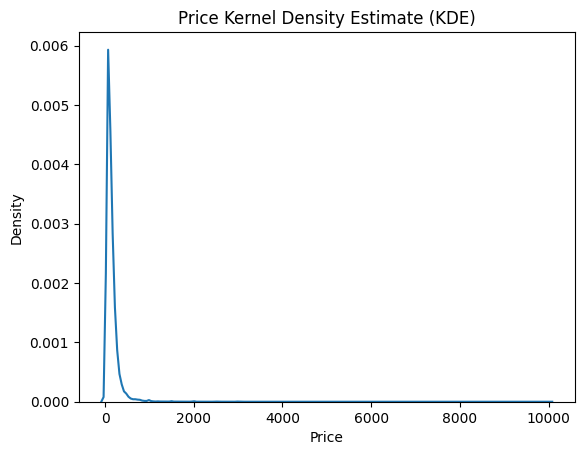

In [ ]:
sns.kdeplot(data=dataset, x="Price")
plt.title('Price Kernel Density Estimate (KDE)')

plt.savefig(f'{getcwd()}/../plots/price_distribution.svg', format='svg')
plt.show()

# **3. Patterns in local name text**

- Cheaper properties tends to focus more on general characteristics such as {clean, quiet, apartment, private room, ...}, which can be seen in the first word cloud;
- More Expensive ones tend to present extra aesthetic characteristics such as {luxury, modern, spacious, beautiful, modern, cozy, ...}, which can be seen in the second word cloud.

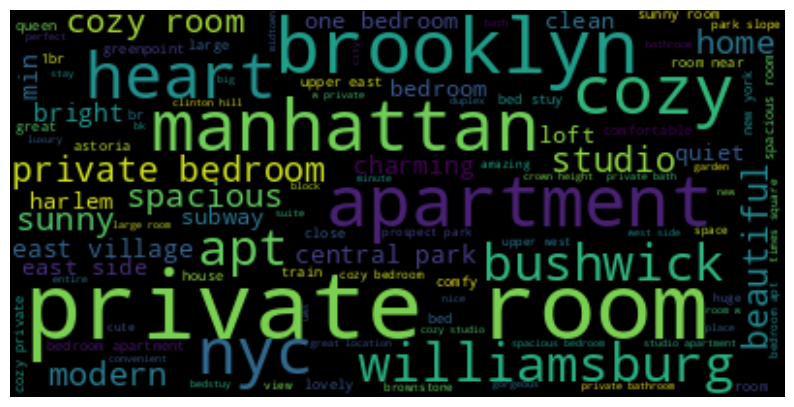

In [ ]:
from wordcloud import WordCloud

# Get rows below the global price mean
low_df = dataset[dataset['Price'] < dataset['Price'].mean()]

text = ' '.join(str(n).lower() for n in low_df['Name'])
wordcloud = WordCloud(max_words=100, background_color='black').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.savefig(f'{getcwd()}/../plots/cheap_wordcloud.svg', format='svg')
plt.show()

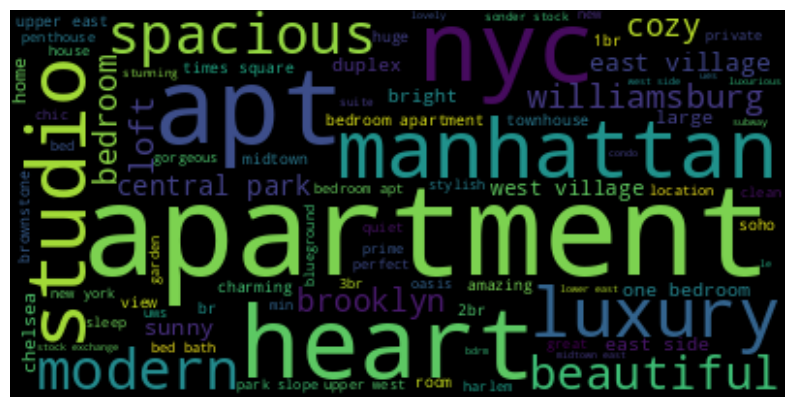

In [ ]:
high_df = dataset[dataset['Price'] > dataset['Price'].mean()]

text = ' '.join(str(n).lower() for n in high_df['Name'])
wordcloud = WordCloud(max_words=100, background_color='black').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.savefig(f'{getcwd()}/../plots/expensive_wordcloud.svg', format='svg')
plt.show()

In [ ]:
from IPython.display import display
import folium

# Playing with folium :p
ny_map = folium.Map(location=[dataset['Latitude'].mean(), dataset['Longitude'].mean()],
                    zoom_start=13)

for idx, prop in dataset.head(50).iterrows():
    folium.Marker(
        location=[prop['Latitude'], prop['Longitude']],
        popup=f"US${prop['Price']} {prop['Neighborhood']}",
        icon=folium.Icon(color='red')
    ).add_to(ny_map)

display(ny_map)

# **4. Dimensionality reduction with PCA**

- PCA (Principal Component Analysis) is a dimensionality reduction algorithm, mostly used to reduce feature space;
- In the graph, we see that we would be able to capture approximately 90% of the variance in the dataset with 12 features;
- These observations will lead to feature selection in the Preprocessing and Machine Learning steps (2 and 3).

In [ ]:
from sklearn.preprocessing import LabelEncoder


def discretize_values(df: pd.DataFrame, column: str) -> pd.DataFrame:

    filterwarnings('ignore')

    # Encodes entire columns of categorical data
    encoding = LabelEncoder()

    encoding.fit(df[column])
    df[column] = encoding.transform(df[column])

    return df

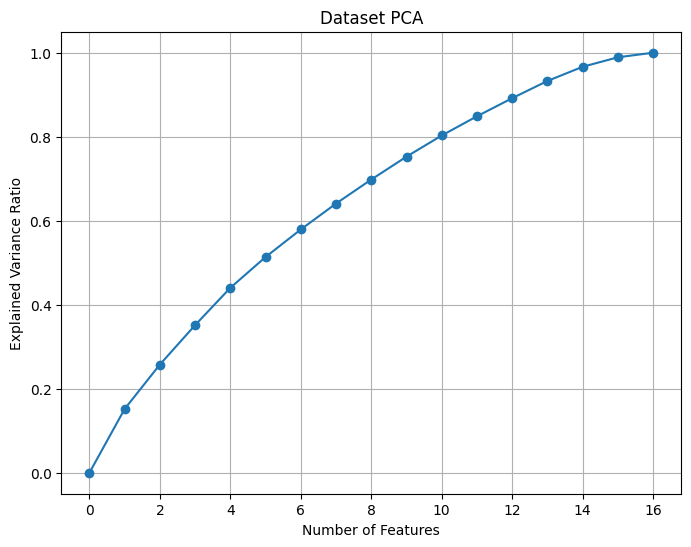

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


pca_df = dataset.copy()

# PCA doesn't support missing and categorical values
pca_df = pca_df.dropna(axis='index')
for col in pca_df.columns.values:
    if pca_df[col].dtype != float and pca_df[col].dtype != int:
        discretize_values(df=pca_df, column=col)

var_ratio = list()
nums = np.arange(len(pca_df.columns.values) + 1)

std_scaler = StandardScaler()
pca_df = std_scaler.fit_transform(pca_df)

for num in nums:
  pca = PCA(n_components=num)
  pca.fit(pca_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 6))
plt.grid()
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Explained Variance Ratio')
plt.title('Dataset PCA')

plt.savefig(f'{getcwd()}/../plots/pca.svg', format='svg')
plt.show()

# **5. Finding the ideal location to invest**

- Considering as most important features:
    - _Price_: With districts with higher average prices, the rate between investments and its return could also be higher;
    - _Reviews_: Districts with higher average on number of reviews show a tendency to lure more tenants, since the place can have a more known and/or better reputation;
    - _Days Available_: Districts in which the properties spend less time available indicates a higher demand on renting.

In [ ]:
grind_locations = dataset.copy()

# Availability median is far lower, but with this conditions, there isn't such property in the dataset
price_mean = grind_locations['Price'].mean()
availability_mean = grind_locations['Days Available'].mean()
reviews_mean = grind_locations['Reviews'].mean()

# Obtaining {Price, Days Available, Reviews} average by district
ideal_locations = grind_locations.groupby('District')[['Price', 'Days Available', 'Reviews']].mean().reset_index()

# Queries for districts in which {Price, Days Available, Reviews} are higher than averages
ideal_locations = ideal_locations.query('Price > @price_mean & `Days Available` < @availability_mean & Reviews > @reviews_mean')
ideal_locations.sort_values(by='Price', ascending=False)

,District,Price,Days Available,Reviews
43,Cobble Hill,211.929293,63.212121,29.171717
119,Lower East Side,186.312843,97.165752,26.521405
64,East Village,186.083108,74.623853,24.106854
41,Clinton Hill,181.893357,95.013986,25.500000
151,Park Slope,176.312253,88.786561,28.928854
19,Boerum Hill,176.135593,77.271186,24.265537
31,Carroll Gardens,175.914163,71.669528,25.309013
158,Prospect Heights,173.372549,77.515406,30.462185
35,Chinatown,161.497283,90.796196,27.013587


- The selected district is Cobble Hill in Brooklyn;
- The average price and number of reviews in this district is far above from the third quantile (contains 75% of the bottom data).

In [ ]:
import scipy.stats as stats

location = ideal_locations.query('District == "Cobble Hill"')
price_q = stats.percentileofscore(dataset["Price"], location['Price'].max(), kind='weak')
available_q = stats.percentileofscore(dataset["Days Available"], location['Days Available'].max(), kind='weak')
review_q = stats.percentileofscore(dataset["Reviews"], location['Reviews'].max(), kind='weak')

print(f'The price is in the highests {round(100 - price_q, 2)}%\n')
print(f'The availability is in the highests {round(available_q, 2)}%\n')
print(f'The number of reviews is in the highests {round(100 - review_q, 2)}%\n')

The price is in the highests 16.49%

The availability is in the highests 53.25%

The number of reviews is in the highests 21.6%

